In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df=pd.read_csv("/content/drive/MyDrive/AIML_FSP_2025-26/water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


EXPLORATORY DATA ANALYSIS


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [94]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [95]:
df["Potability"].value_counts()

,count
Potability,
0,1998
1,1278


In [96]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


<Figure size 200x200 with 0 Axes>

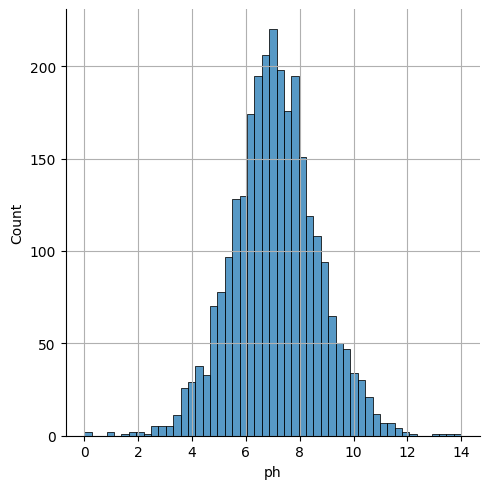

In [97]:
plt.figure(figsize=(2,2))
sns.displot(df["ph"])
plt.grid()

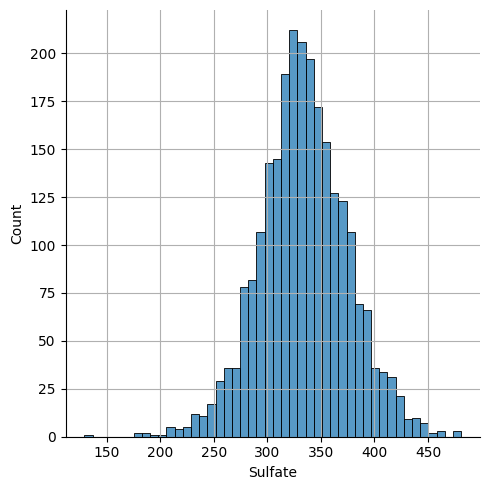

In [98]:
sns.displot(df["Sulfate"])
plt.grid()

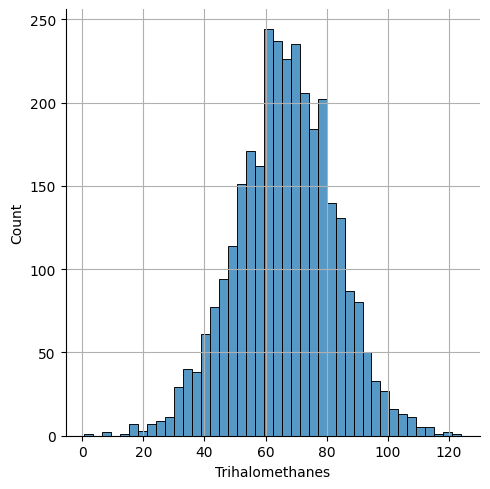

In [99]:
sns.displot(df["Trihalomethanes"])
plt.grid()

DATA PREPROCESSING


In [100]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].median())

In [101]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [102]:
x = df.iloc[:,:-1].values
x

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [103]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30543373e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.39186284e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  8.00012586e-04, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18037800e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.02755628e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.79510303e-01, -2.12445866e+00]])

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train

array([[ 0.50464818,  0.37315041,  0.03361713, ...,  0.55953869,
        -0.38138432, -0.1684739 ],
       [-0.70990262,  0.93276768, -1.02943561, ..., -2.16545398,
        -1.5992954 , -0.47749114],
       [ 0.92834954,  0.97805675,  0.79300701, ...,  0.08140197,
        -0.3675427 ,  0.55611958],
       ...,
       [ 0.05661219,  0.22546494,  1.39291158, ...,  0.58533078,
         1.50795333, -0.78494517],
       [-0.29606571, -0.79391589,  0.16174057, ...,  1.80783802,
         0.79234944,  0.26128564],
       [-0.31487627,  1.13437054, -0.27548395, ..., -0.76151299,
         0.43027877,  0.60352651]])

COMPARING VARIOUS ML ALGORITHMS


In [106]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model1=LogisticRegression(class_weight="balanced", random_state=42)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

print("Accuracy = ",accuracy_score(y_test, y_pred))
print("\nConfusion Matrix :-\n ",confusion_matrix(y_test,y_pred))
print("\nClassification report :-\n",classification_report(y_test, y_pred))

Accuracy =  0.5289634146341463

Confusion Matrix :-
  [[209 191]
 [118 138]]

Classification report :-
               precision    recall  f1-score   support

           0       0.64      0.52      0.57       400
           1       0.42      0.54      0.47       256

    accuracy                           0.53       656
   macro avg       0.53      0.53      0.52       656
weighted avg       0.55      0.53      0.53       656



In [108]:
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(class_weight="balanced", random_state=42)
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

print("Accuracy = ",accuracy_score(y_test, y_pred))
print("\nConfusion Matrix :-\n ",confusion_matrix(y_test,y_pred))
print("\nClassification report :-\n",classification_report(y_test, y_pred))

Accuracy =  0.663109756097561

Confusion Matrix :-
  [[362  38]
 [183  73]]

Classification report :-
               precision    recall  f1-score   support

           0       0.66      0.91      0.77       400
           1       0.66      0.29      0.40       256

    accuracy                           0.66       656
   macro avg       0.66      0.60      0.58       656
weighted avg       0.66      0.66      0.62       656



In [109]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model3=SVC(kernel='poly',class_weight="balanced", random_state=42)
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)

print("Accuracy = ",accuracy_score(y_test, y_pred))
print("\nConfusion Matrix :-\n ",confusion_matrix(y_test,y_pred))
print("\nClassification report :-\n",classification_report(y_test, y_pred))

Accuracy =  0.5579268292682927

Confusion Matrix :-
  [[268 132]
 [158  98]]

Classification report :-
               precision    recall  f1-score   support

           0       0.63      0.67      0.65       400
           1       0.43      0.38      0.40       256

    accuracy                           0.56       656
   macro avg       0.53      0.53      0.53       656
weighted avg       0.55      0.56      0.55       656



In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model3=SVC(kernel='sigmoid',class_weight="balanced", random_state=42)
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)

print("Accuracy = ",accuracy_score(y_test, y_pred))
print("\nConfusion Matrix :-\n ",confusion_matrix(y_test,y_pred))
print("\nClassification report :-\n",classification_report(y_test, y_pred))

Accuracy =  0.510670731707317

Confusion Matrix :-
  [[199 201]
 [120 136]]

Classification report :-
               precision    recall  f1-score   support

           0       0.62      0.50      0.55       400
           1       0.40      0.53      0.46       256

    accuracy                           0.51       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.54      0.51      0.52       656



In [112]:
print("Enter details for predicting your water sample is potable or not : ")
a1 = float(input("ph: "))
a2 = float(input("Hardness: "))
a3 = float(input("Solids: "))
a4 = float(input("Chloramines: "))
a5 = float(input("Sulfate: "))
a6 = float(input("Conductivity: "))
a7 = float(input("Organic_carbon: "))
a8 = float(input("Trihalomethanes: "))
a9 = float(input("Turbidity: "))

pred = model2.predict(sc.transform([[a1,a2,a3,a4,a5,a6,a7,a8,a9]]))
if (pred):
  print("\nYour water sample is potable.")
else:
  print("\nYour water sample is not potable.")

Enter details for predicting your water sample is potable or not : 
ph: 7.12
Hardness: 178.65
Solids: 25840.78
Chloramines: 7.48
Sulfate: 312.98
Conductivity: 324.78
Organic_carbon: 16.89
Trihalomethanes: 69.68
Turbidity: 3.47

Your water sample is potable.
